In [1]:
#check the direction

In [2]:
import os
print(os.getcwd())

C:\Program Files\Microsoft VS Code


In [3]:
import os

# Change to your project directory (update the path as needed)
os.chdir(r"G:\Snow-Analyze-in-Iran")

# Verify the change
print(os.getcwd())

G:\Snow-Analyze-in-Iran


In [5]:
import xarray as xr
import pandas as pd
import pandas as gpd
import regionmask
import numpy as np
import geopandas
import xarray as xr
import xarray as xr
import seaborn as sns
import rioxarray
from shapely.geometry import mapping
import netCDF4
import netCDF4 as nc
from PIL import Image
import os
from netCDF4 import Dataset
import geopandas as gpd
import numpy as np
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy.stats import linregress
#from xarrayMannKendall import MannKendall
import pymannkendall as mk
import xarray as xr
import numpy as np
from scipy.stats import kendalltau

In [6]:
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")

In [7]:
data_Snow

<xarray.Dataset> Size: 301MB
Dimensions:    (time: 624, longitude: 93, latitude: 81)
Coordinates:
  * time       (time) datetime64[ns] 5kB 1972-01-01 1972-02-01 ... 2023-12-01
  * longitude  (longitude) float32 372B 42.0 42.25 42.5 ... 64.5 64.75 65.0
  * latitude   (latitude) float32 324B 42.0 41.75 41.5 41.25 ... 22.5 22.25 22.0
Data variables:
    asn        (time, latitude, longitude) float64 38MB ...
    snowc      (time, latitude, longitude) float64 38MB ...
    rsn        (time, latitude, longitude) float64 38MB ...
    sde        (time, latitude, longitude) float64 38MB ...
    sd         (time, latitude, longitude) float64 38MB ...
    sf         (time, latitude, longitude) float64 38MB ...
    smlt       (time, latitude, longitude) float64 38MB ...
    tsn        (time, latitude, longitude) float64 38MB ...
Attributes:
    CDI:          Climate Data Interface version 2.0.2 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Sat Jul 06 13:32:45 2024: cdo seldate,1972-01-01,2023-12-01...
    CDO:          Climate Data Operators version 2.0.2 (https://mpimet.mpg.de...

In [3]:
#Variables names
# asn:Snow albedo ((0 - 1)), snowc: snow cover (%), 
#rsn:Snow density (kg m**-3), sde:Snow depth (m), sd:Snow depth (m of water equivalent),
#sf:Snowfall (m of water equivalent), smlt: Snowmelt (m of water equivalent), tsn:Temperature of snow layer (K)

#-------------------------------------------------------------------------------------------------------------#

data_Snow = xr.open_dataset("G:\Snow-Analyze-in-Iran\snow_iran-mon-1950-2023.nc")
snow_cover= data_Snow['snowc']
Snow_albedo = data_Snow['asn']
Snow_density = data_Snow['rsn']
Snow_depth = data_Snow['sde']
Snow_depth_water = data_Snow['sd']
Snow_snowfall = data_Snow['sf']
Snow_snowmelt = data_Snow['smlt']
Snow_Temperature = data_Snow['tsn']
snow_cover

<xarray.DataArray 'snowc' (time: 888, latitude: 201, longitude: 231)>
[41230728 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 42.0 42.1 42.2 42.3 ... 64.7 64.8 64.9 65.0
  * latitude   (latitude) float32 42.0 41.9 41.8 41.7 ... 22.3 22.2 22.1 22.0
  * time       (time) datetime64[ns] 1950-01-01 1950-02-01 ... 2023-12-01
Attributes:
    units:      %
    long_name:  Snow cover

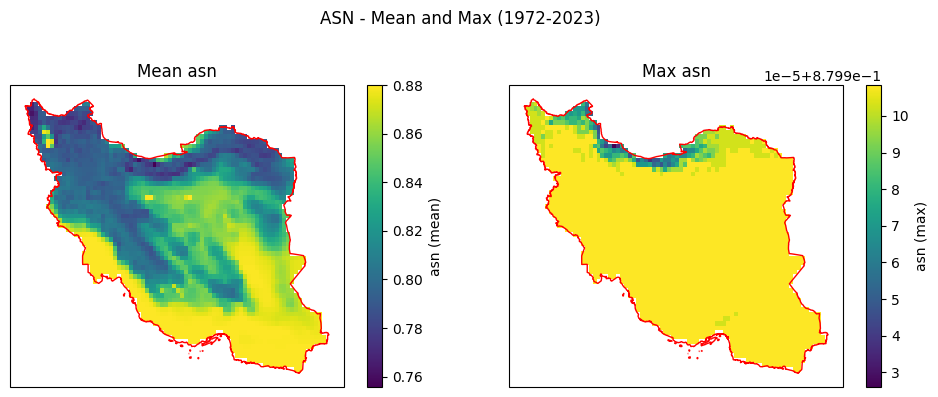

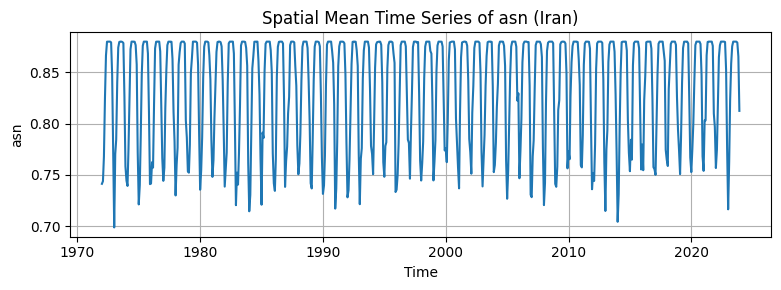

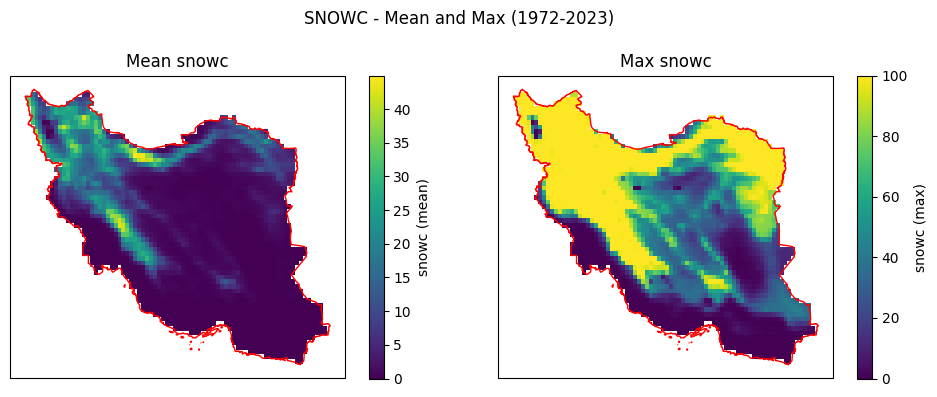

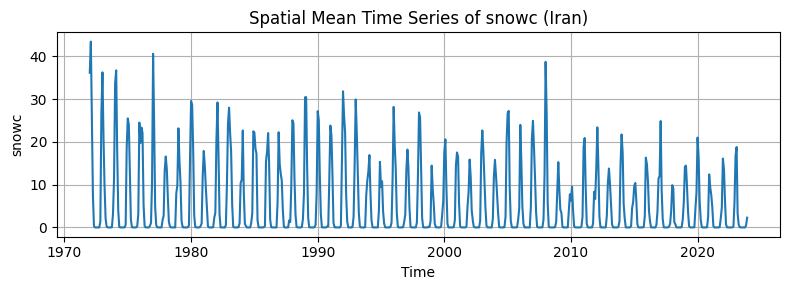

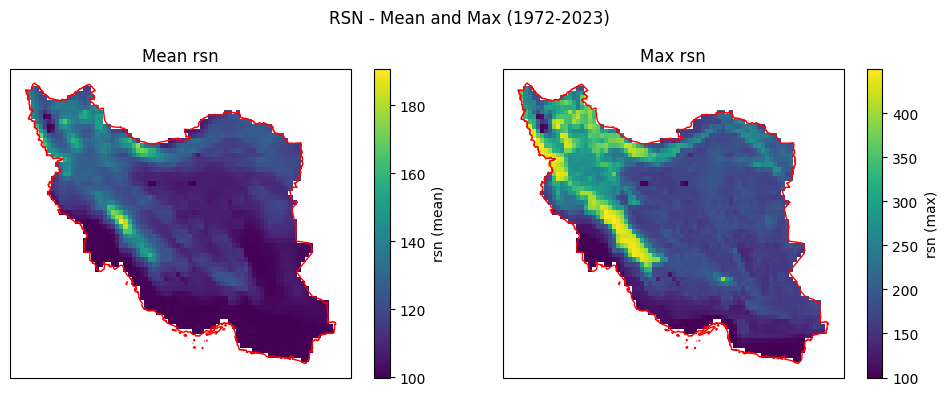

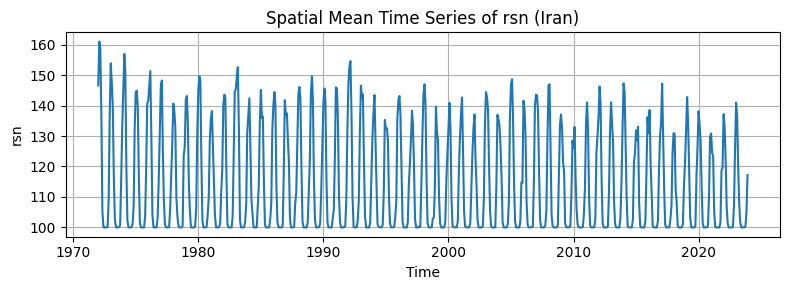

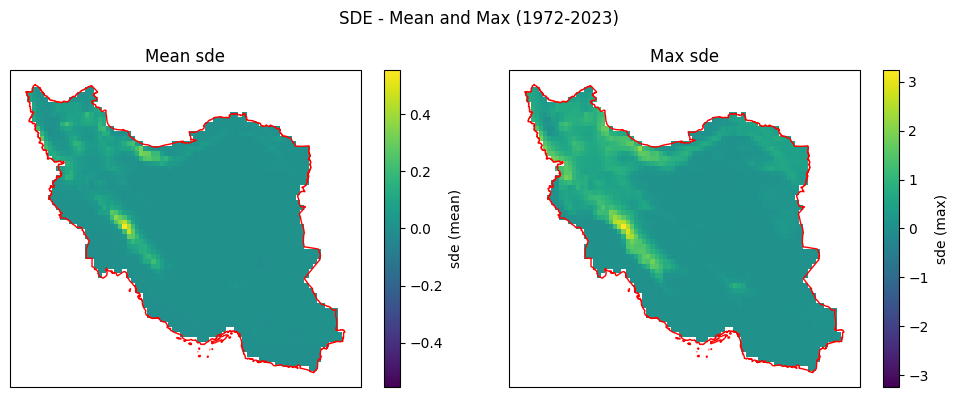

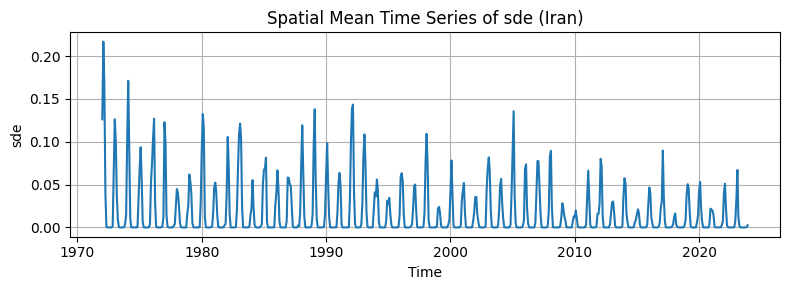

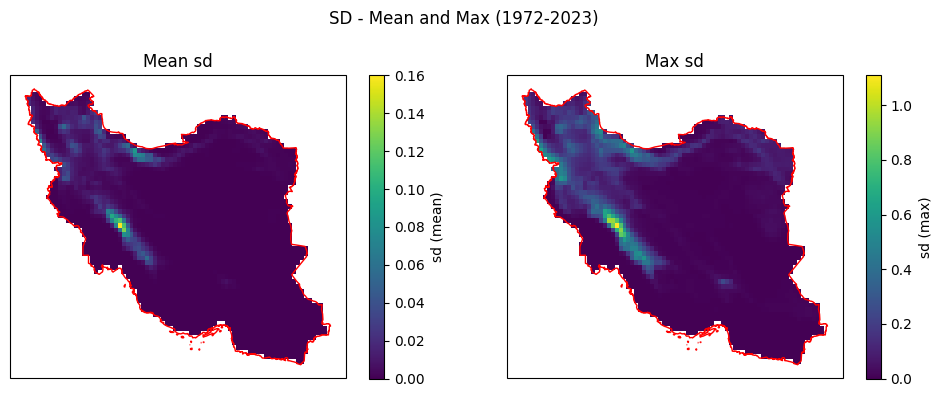

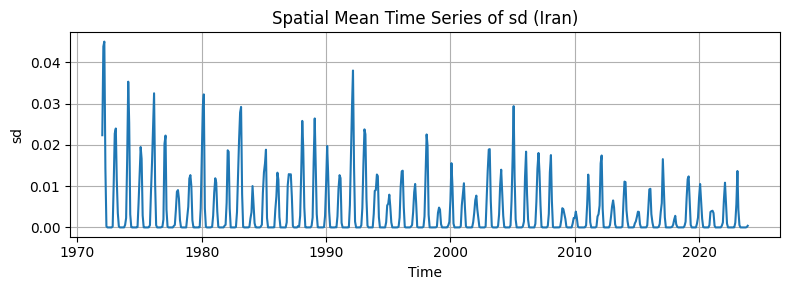

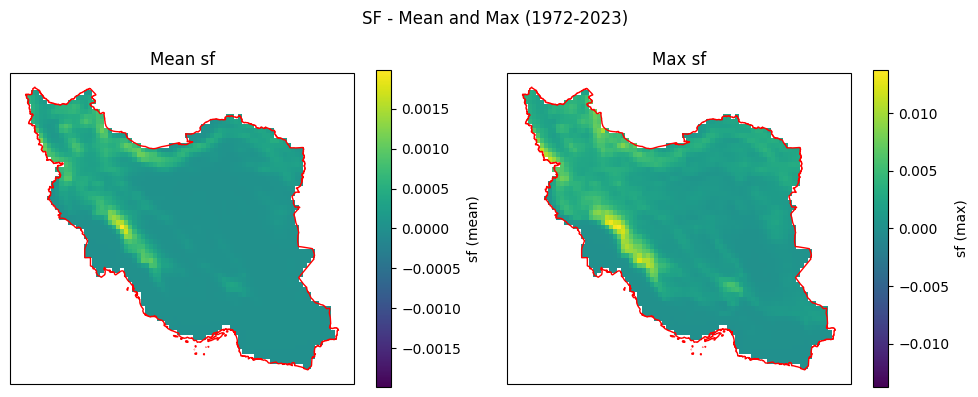

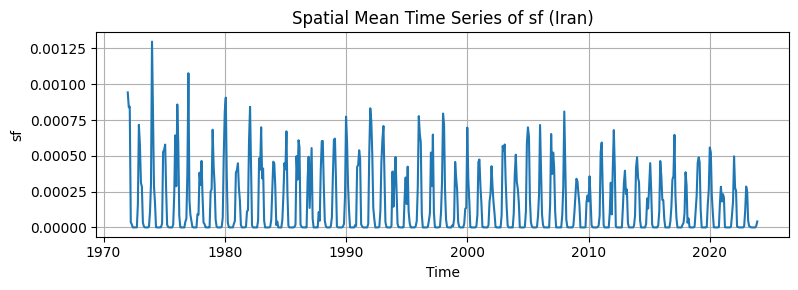

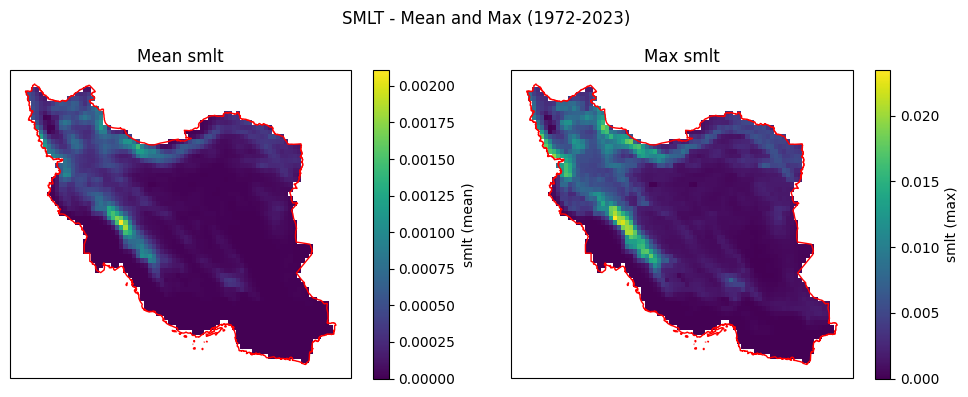

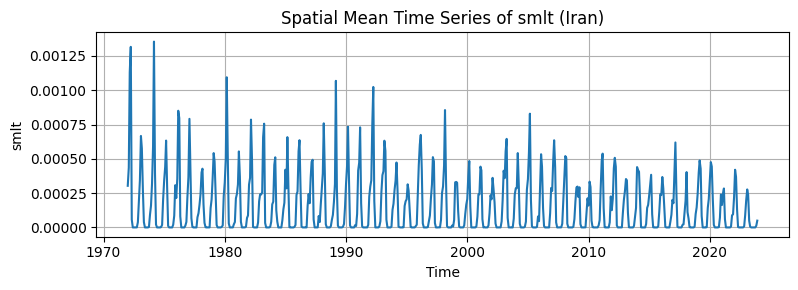

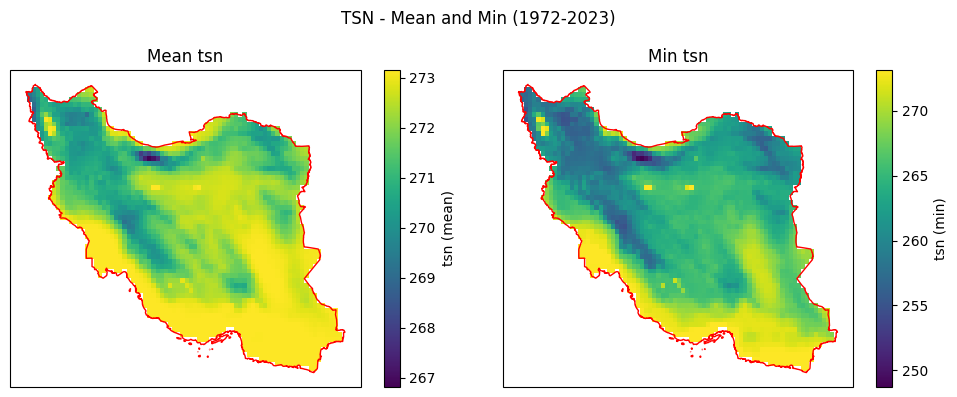

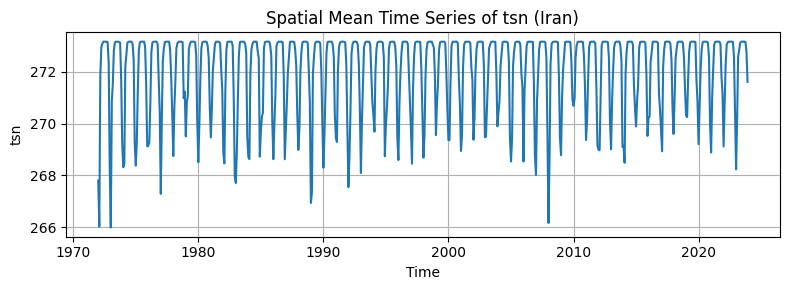

All maps and time series charts are shown and saved.


In [13]:
import xarray as xr
import rioxarray
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import os

# Load Data
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
variables = ['asn', 'snowc', 'rsn', 'sde', 'sd', 'sf', 'smlt', 'tsn']

# Load and Prepare Shapefile
iran_shp = gpd.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")  # Make sure CRS matches your data

# Create output directories
os.makedirs("output_maps", exist_ok=True)
os.makedirs("output_timeseries", exist_ok=True)

# Loop through variables
for var in variables:
    da = data_Snow[var]
    da = da.rio.write_crs("EPSG:4326")
    da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)
    
    mean_map = da_clip.mean(dim='time')
    
    if var == 'tsn':
        other_map = da_clip.min(dim='time')
        other_label = 'min'
        other_title = 'Min'
    else:
        other_map = da_clip.max(dim='time')
        other_label = 'max'
        other_title = 'Max'
    
    # Plot mean and other (max or min) maps side by side
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), subplot_kw={'projection': ccrs.PlateCarree()})
    
    # Mean map
    mean_map.plot(ax=axes[0], cmap='viridis', cbar_kwargs={'label': f'{var} (mean)'}, add_colorbar=True)
    iran_shp.boundary.plot(ax=axes[0], edgecolor='red', linewidth=1)
    axes[0].set_title(f'Mean {var}')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('')
    
    # Max or Min map
    other_map.plot(ax=axes[1], cmap='viridis', cbar_kwargs={'label': f'{var} ({other_label})'}, add_colorbar=True)
    iran_shp.boundary.plot(ax=axes[1], edgecolor='red', linewidth=1)
    axes[1].set_title(f'{other_title} {var}')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    plt.suptitle(f'{var.upper()} - Mean and {other_title} (1972-2023)', fontsize=12)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()
    fig.savefig(f'output_maps/map_mean_{other_label}_{var}.png', dpi=150)
    plt.close(fig)
    
    # Plot and save time series of spatial mean
    ts = da_clip.mean(dim=['latitude', 'longitude'])
    plt.figure(figsize=(8, 3))
    ts.plot()
    plt.title(f'Spatial Mean Time Series of {var} (Iran)')
    plt.ylabel(var)
    plt.xlabel('Time')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.savefig(f'output_timeseries/timeseries_{var}.png', dpi=150)
    plt.close()

print("All maps and time series charts are shown and saved.")

Variables:   0%|          | 0/8 [00:00<?, ?it/s]


Processing asn ...


Saved trend results for asn to trend_results/asn_trend.csv


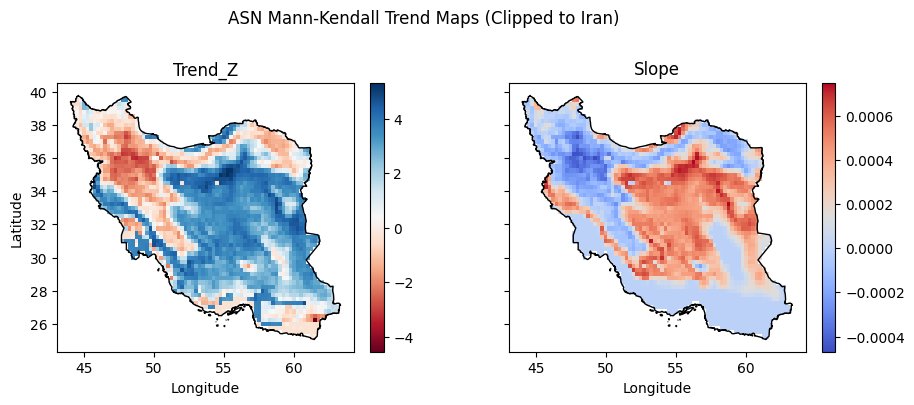

Variables:  12%|█▎        | 1/8 [00:19<02:14, 19.23s/it]


Processing snowc ...


Saved trend results for snowc to trend_results/snowc_trend.csv


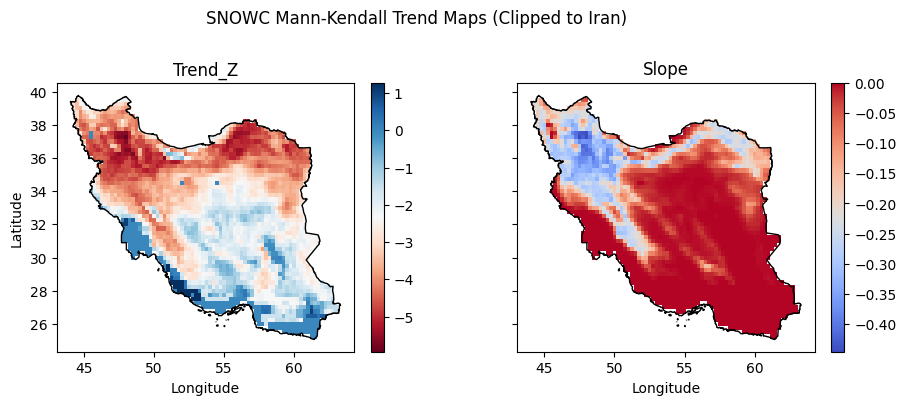

Variables:  25%|██▌       | 2/8 [00:35<01:46, 17.72s/it]


Processing rsn ...


Saved trend results for rsn to trend_results/rsn_trend.csv


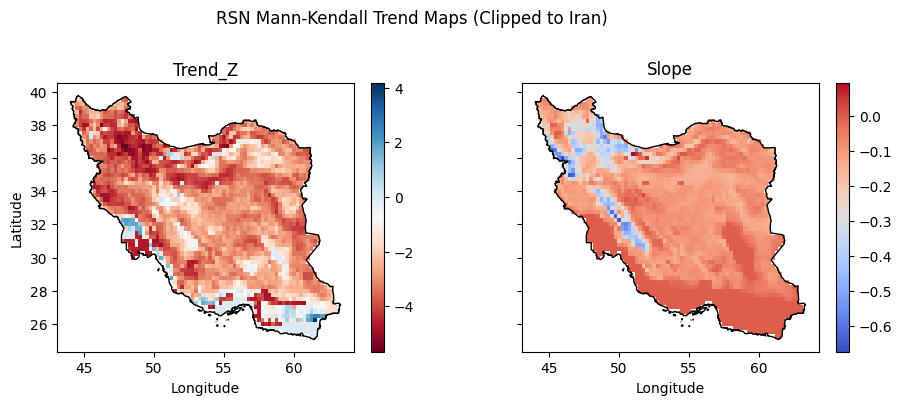

Variables:  38%|███▊      | 3/8 [00:51<01:23, 16.60s/it]


Processing sde ...


Saved trend results for sde to trend_results/sde_trend.csv


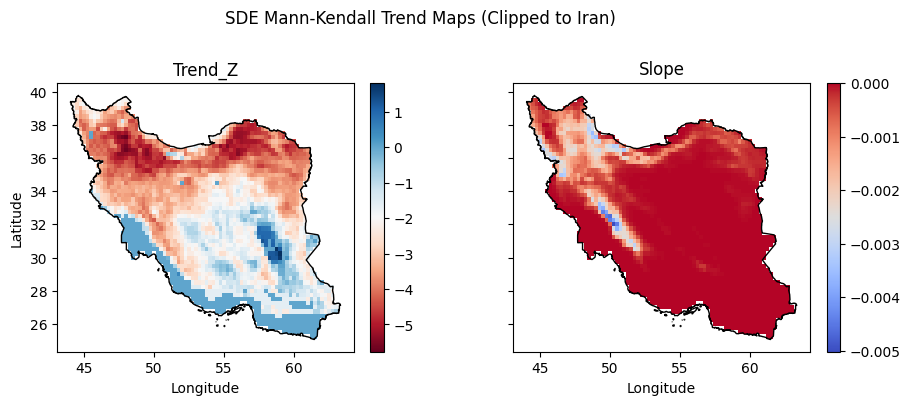

Variables:  50%|█████     | 4/8 [01:07<01:05, 16.32s/it]


Processing sd ...


Saved trend results for sd to trend_results/sd_trend.csv


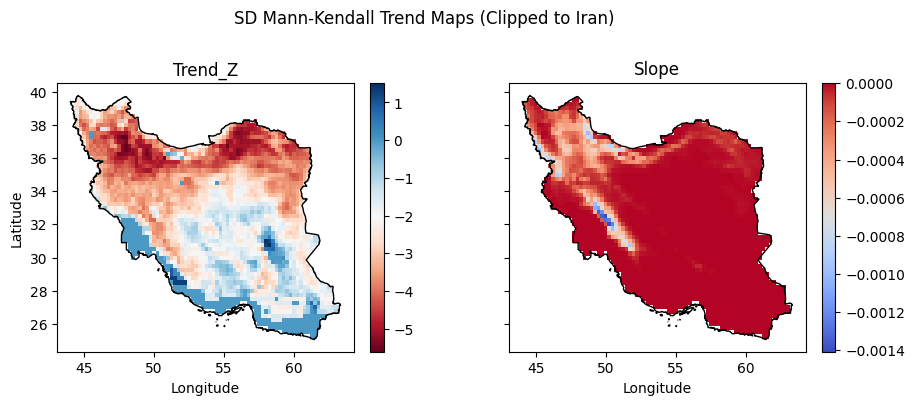

Variables:  62%|██████▎   | 5/8 [01:23<00:48, 16.24s/it]


Processing sf ...


Saved trend results for sf to trend_results/sf_trend.csv


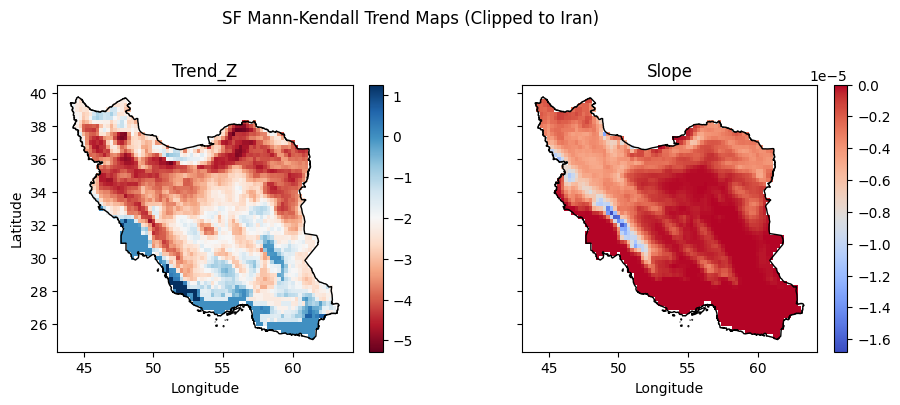

Variables:  75%|███████▌  | 6/8 [01:40<00:33, 16.78s/it]


Processing smlt ...


Saved trend results for smlt to trend_results/smlt_trend.csv


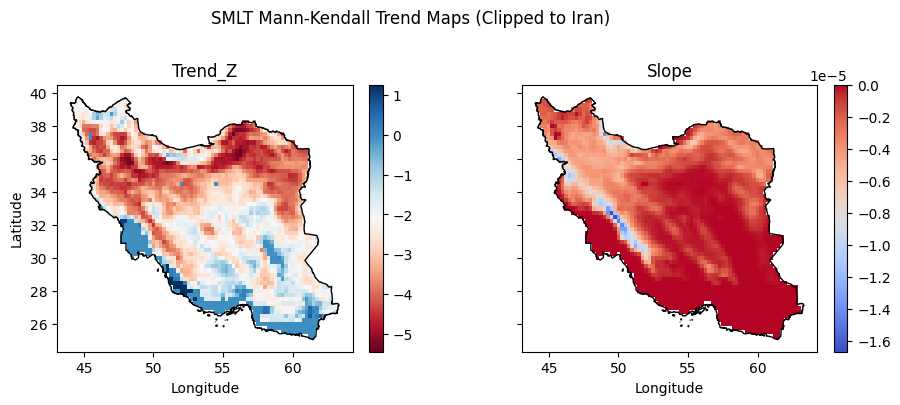

Variables:  88%|████████▊ | 7/8 [02:09<00:20, 20.65s/it]


Processing tsn ...


Saved trend results for tsn to trend_results/tsn_trend.csv


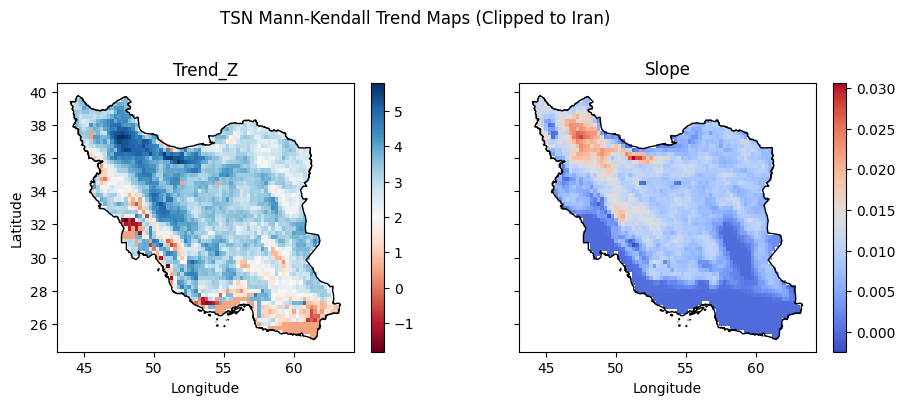

Variables: 100%|██████████| 8/8 [02:25<00:00, 18.14s/it]


All trend results and maps are saved.


In [16]:
import xarray as xr
import numpy as np
import pymannkendall as mk
import pandas as pd
import os
from tqdm import tqdm
import matplotlib.pyplot as plt
import geopandas as gpd
import rioxarray

# Load your data
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
variables = ['asn', 'snowc', 'rsn', 'sde', 'sd', 'sf', 'smlt', 'tsn']

# Load and prepare shapefile
iran_shp = gpd.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")  # Ensure CRS matches your data

# Create output directories
os.makedirs("trend_results", exist_ok=True)
os.makedirs("trend_maps", exist_ok=True)

for variable_name in tqdm(variables, desc="Variables", position=0):
    print(f"\nProcessing {variable_name} ...")
    # Clip data to Iran shapefile
    da = data_Snow[variable_name]
    da = da.rio.write_crs("EPSG:4326")
    da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)
    
    # 1. Aggregate to annual means (or sum, if you want annual totals)
    annual_data = da_clip.groupby('time.year').mean(dim='time')  # shape: (years, lat, lon)
    latitudes = annual_data.latitude.values
    longitudes = annual_data.longitude.values

    # 2. Initialize arrays for maps
    shape = (len(latitudes), len(longitudes))
    trend_z_map = np.full(shape, np.nan)
    trend_slope_map = np.full(shape, np.nan)

    total_cells = len(latitudes) * len(longitudes)
    cell_iter = tqdm(total=total_cells, desc=f"{variable_name} grid cells", position=1, leave=False)

    # 3. Loop over each grid cell
    for lat_idx in range(len(latitudes)):
        for lon_idx in range(len(longitudes)):
            time_series = annual_data[:, lat_idx, lon_idx].values
            # Remove NaNs
            time_series = time_series[~np.isnan(time_series)]
            # Check if there are enough data points for the Mann-Kendall test
            if len(time_series) < 2:
                cell_iter.update(1)
                continue
            else:
                try:
                    trend, h, p, z, tau, s, var_s, slope, intercept = mk.original_test(time_series)
                    trend_z_map[lat_idx, lon_idx] = z
                    trend_slope_map[lat_idx, lon_idx] = slope
                except ZeroDivisionError:
                    pass
                cell_iter.update(1)
    cell_iter.close()

    # 4. Create a DataFrame from the arrays
    lat_grid, lon_grid = np.meshgrid(latitudes, longitudes, indexing='ij')
    df = pd.DataFrame({
        'Latitude': lat_grid.flatten(),
        'Longitude': lon_grid.flatten(),
        'Trend_Z': trend_z_map.flatten(),
        'Slope': trend_slope_map.flatten()
    })
    # Remove rows with all NaNs
    df = df.dropna(subset=['Trend_Z', 'Slope'], how='all')

    # 5. Save DataFrame to CSV
    out_path = f"trend_results/{variable_name}_trend.csv"
    df.to_csv(out_path, index=False)
    print(f"Saved trend results for {variable_name} to {out_path}")

    # 6. Plot maps for Trend_Z and Slope
    fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharex=True, sharey=True)
    titles = ['Trend_Z', 'Slope']
    maps = [trend_z_map, trend_slope_map]
    cmaps = ['RdBu', 'coolwarm']

    for i, ax in enumerate(axes):
        im = ax.pcolormesh(longitudes, latitudes, maps[i], cmap=cmaps[i])
        iran_shp.boundary.plot(ax=ax, edgecolor='black', linewidth=1)
        plt.colorbar(im, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
        ax.set_title(titles[i])
        ax.set_xlabel('Longitude')
        if i == 0:
            ax.set_ylabel('Latitude')
    plt.suptitle(f"{variable_name.upper()} Mann-Kendall Trend Maps (Clipped to Iran)")
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"trend_maps/{variable_name}_trendZ_slope_maps.png", dpi=150)
    plt.show()
    plt.close(fig)

print("\nAll trend results and maps are saved.")

Processing asn ...
Saved PDF and CDF plots for asn.
Processing snowc ...
Saved PDF and CDF plots for snowc.
Processing rsn ...
Saved PDF and CDF plots for rsn.
Processing sde ...
Saved PDF and CDF plots for sde.
Processing sd ...
Saved PDF and CDF plots for sd.
Processing sf ...


c:\Users\AAAli\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


Saved PDF and CDF plots for sf.
Processing smlt ...
Saved PDF and CDF plots for smlt.
Processing tsn ...
Saved PDF and CDF plots for tsn.
All PDF and CDF plots are saved in the 'pdf_cdf_plots' folder.
Displaying: snowc_pdf
Displaying: snowc_cdf
Displaying: sde_pdf
Displaying: sde_cdf


C:\Users\AAAli\AppData\Local\Temp\ipykernel_16260\2454555818.py:126: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


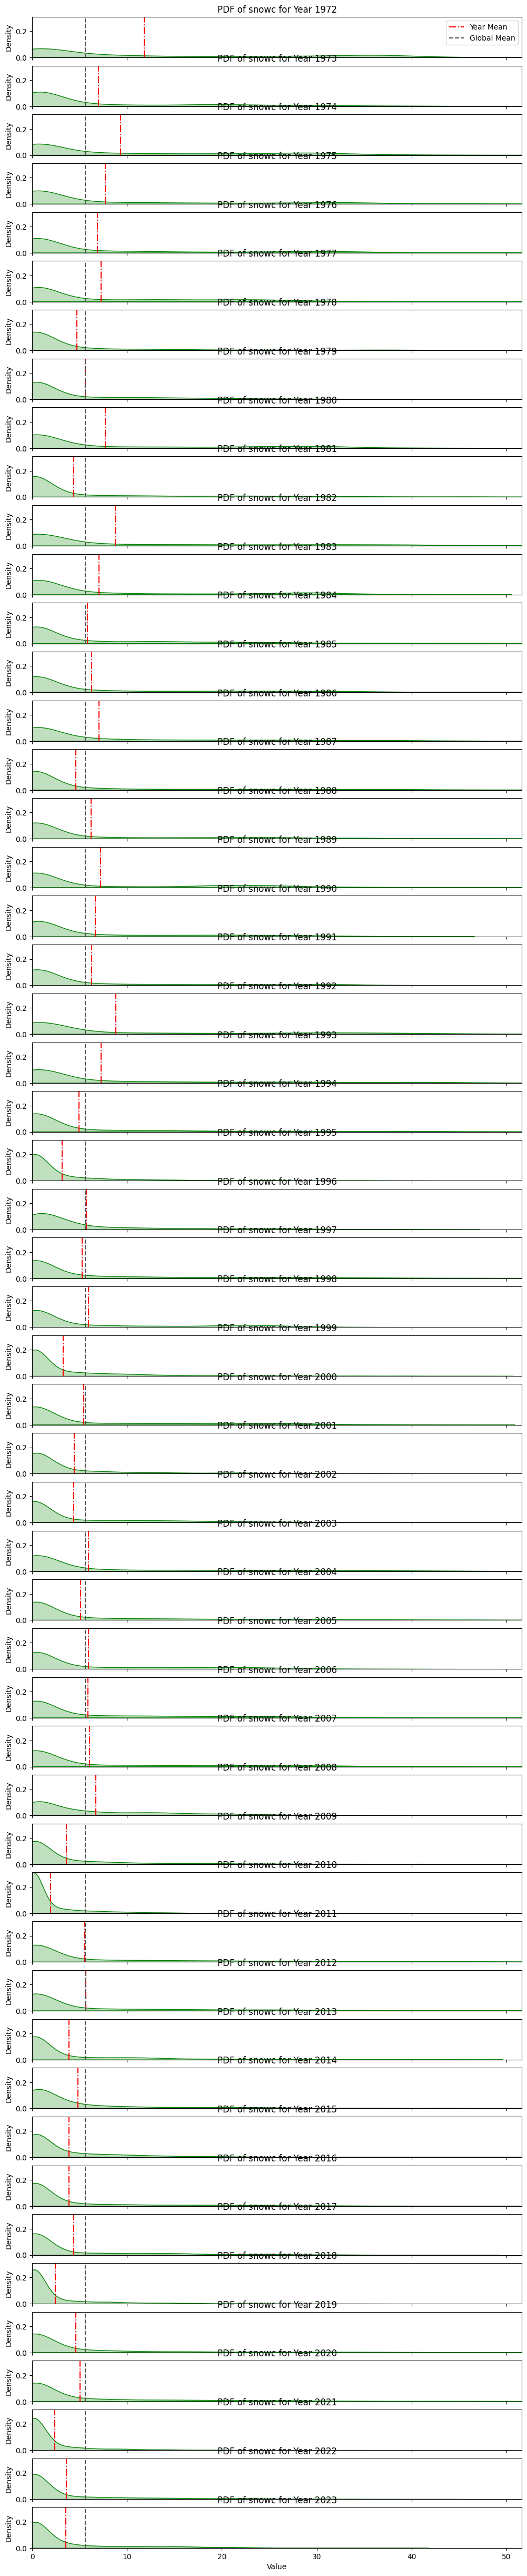

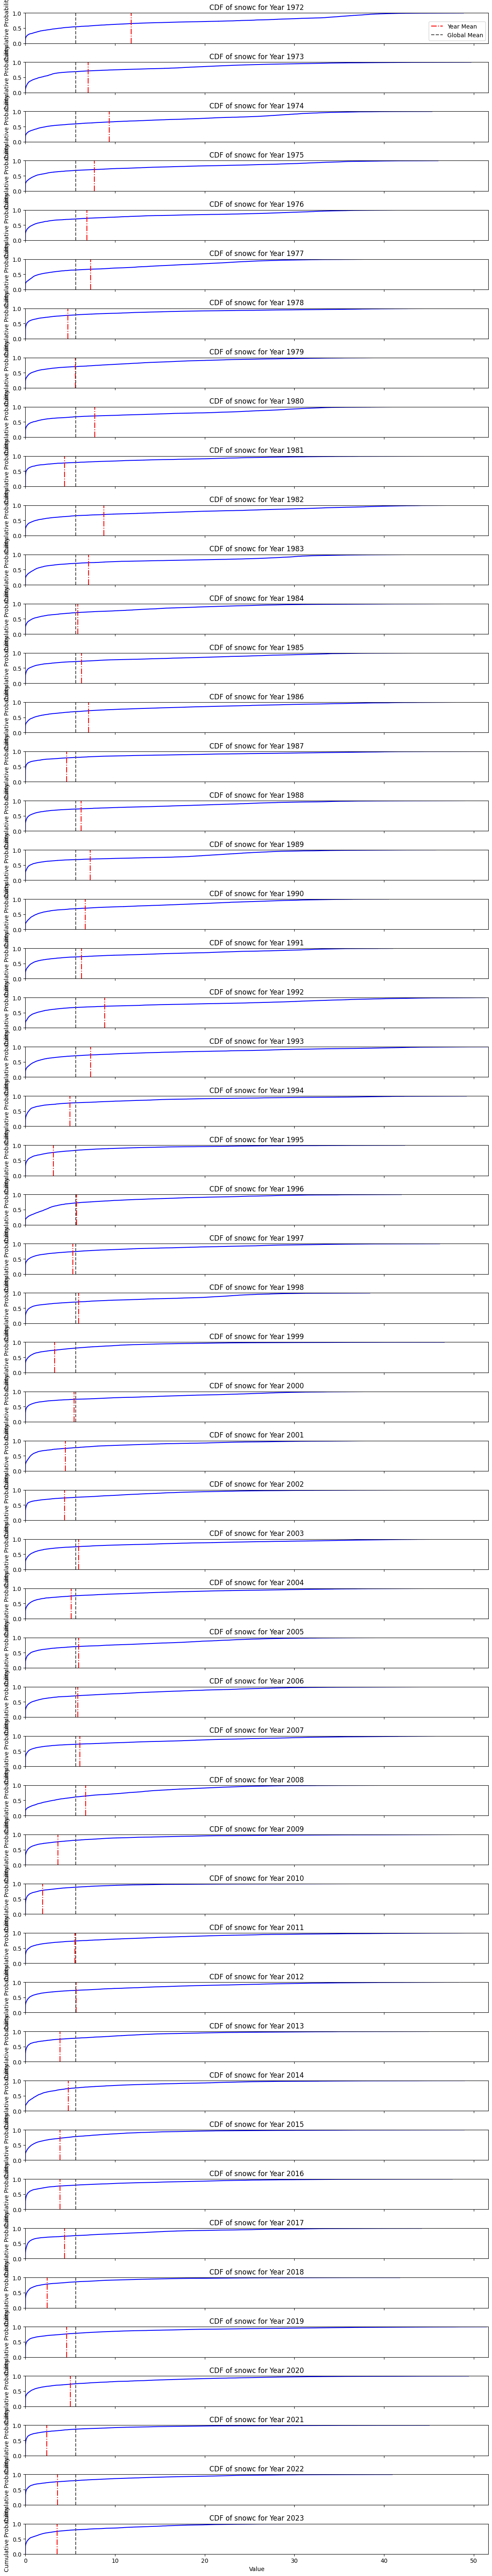

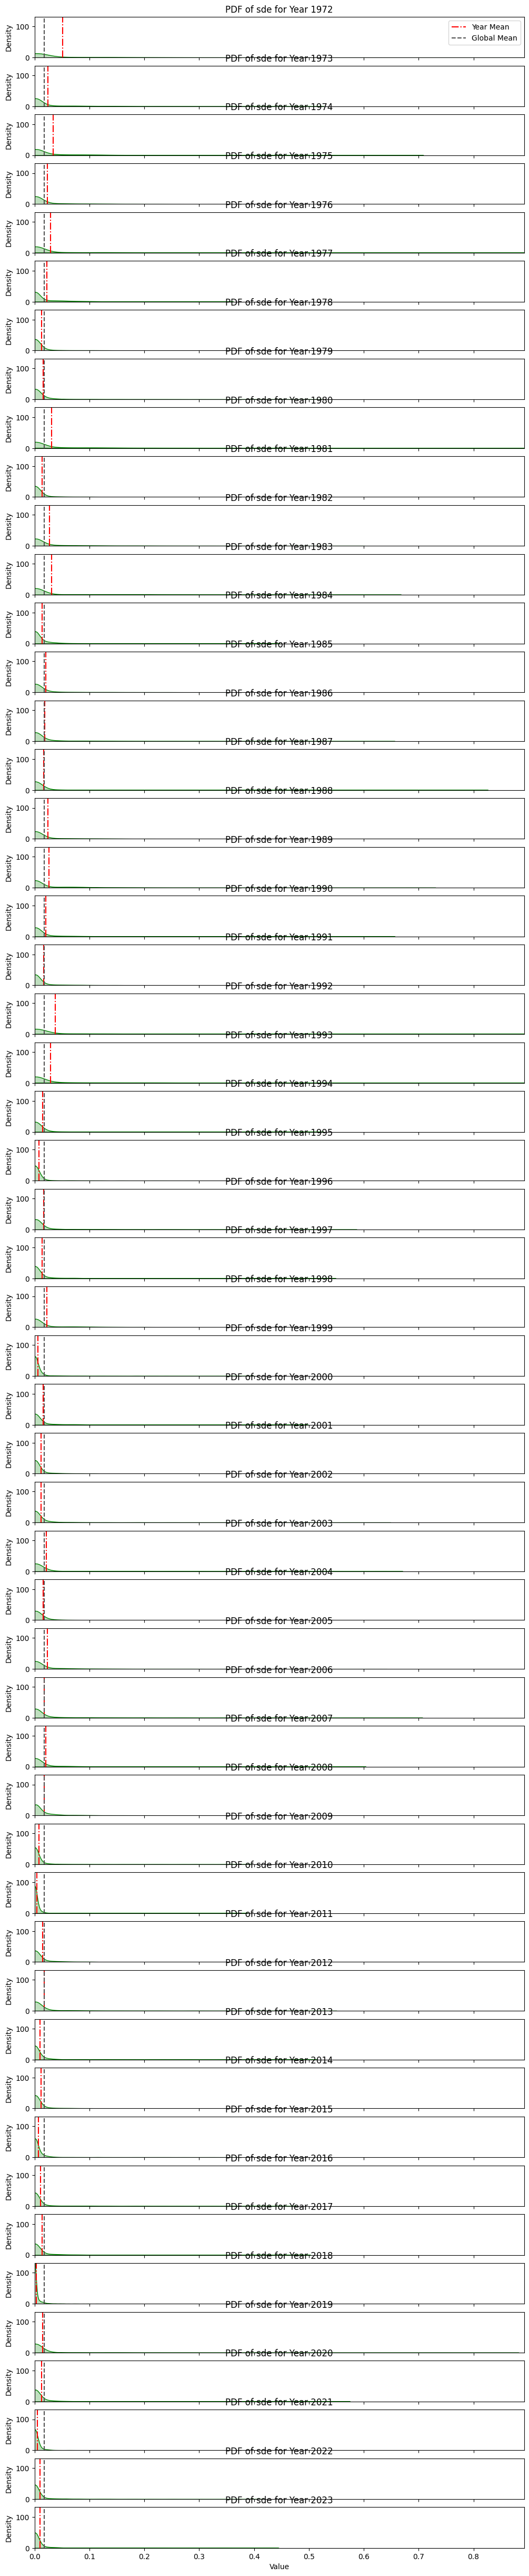

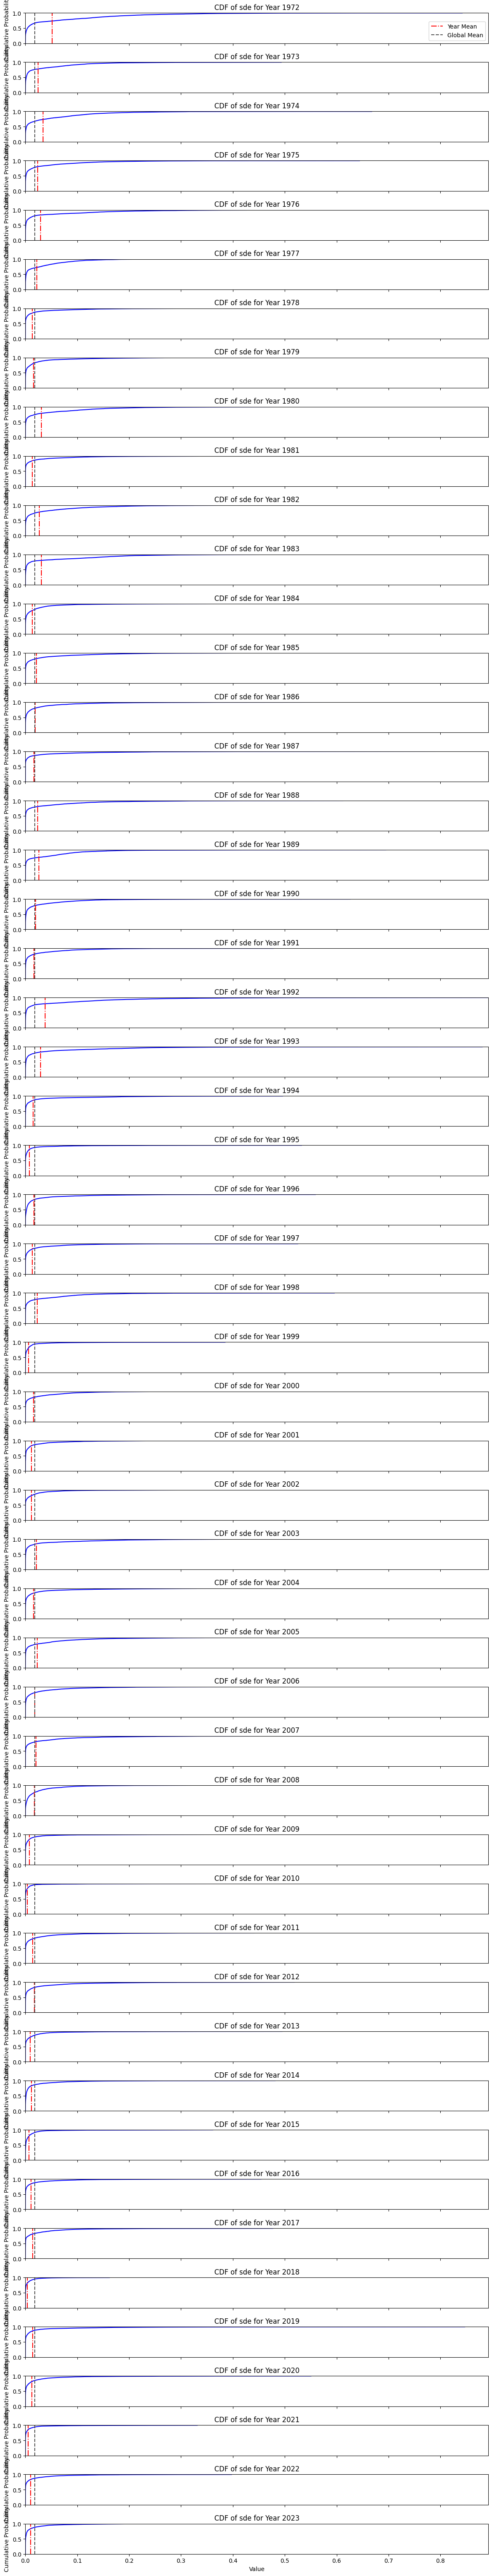

In [19]:
import xarray as xr
import rioxarray
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy.stats import gaussian_kde

# Load data and shapefile
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
iran_shp = gpd.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")

variables = ['asn', 'snowc', 'rsn', 'sde', 'sd', 'sf', 'smlt', 'tsn']
os.makedirs("pdf_cdf_plots", exist_ok=True)

# For displaying only these variables at the end
display_vars = ['snowc', 'sde']
display_figs = {}

for var in variables:
    print(f"Processing {var} ...")
    da = data_Snow[var]
    da = da.rio.write_crs("EPSG:4326")
    da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)
    annual_mean = da_clip.groupby('time.year').mean(dim='time')
    n_years = annual_mean.shape[0]
    years = annual_mean['year'].values

    # Calculate global mean and quantiles for all data
    all_mean = annual_mean.mean().item()
    total_quantiles = np.percentile(annual_mean.values.flatten(), [2.5, 10, 25, 75, 90, 97.5])
    colors = ['blue', 'orange', 'green', 'purple', 'cyan', 'magenta']

    # --------- Find the max density for all years (for PDF y-axis) ---------
    max_density = 0
    x_min = np.nanmin(annual_mean.values)
    x_max = np.nanmax(annual_mean.values)
    x_grid = np.linspace(x_min, x_max, 500)
    for year in years:
        data_1d = annual_mean.sel(year=year).values.flatten()
        data_1d = data_1d[~np.isnan(data_1d)]
        if len(data_1d) > 1:
            kde = gaussian_kde(data_1d)
            density = kde(x_grid)
            max_density = max(max_density, np.max(density))
    if max_density == 0:
        max_density = 0.4  # fallback

    # --------- PDF plots ---------
    fig_pdf, axs_pdf = plt.subplots(nrows=n_years, ncols=1, figsize=(12, n_years*1.2), sharex=True, sharey=True)
    # --------- CDF plots ---------
    fig_cdf, axs_cdf = plt.subplots(nrows=n_years, ncols=1, figsize=(12, n_years*1.2), sharex=True, sharey=True)

    for i, year in enumerate(years):
        data_1d = annual_mean.sel(year=year).values.flatten()
        data_1d = data_1d[~np.isnan(data_1d)]
        if len(data_1d) == 0:
            continue

        # PDF (KDE)
        sns.kdeplot(
            data_1d,
            shade=True,
            bw_adjust=1,
            ax=axs_pdf[i],
            color='green'
        )
        mean = np.mean(data_1d)
        axs_pdf[i].axvline(mean, color='red', linestyle='dashdot', label='Year Mean' if i==0 else "")
        axs_pdf[i].axvline(all_mean, color='#525252', linestyle='--', label='Global Mean' if i==0 else "")
        for j in range(1, len(total_quantiles) - 1):
            axs_pdf[i].fill_between(
                [total_quantiles[j], total_quantiles[j+1]],
                0, max_density,
                color=colors[j-1],
                alpha=0.2
            )
        if i == n_years - 1:
            axs_pdf[i].set_xlabel('Value')
        axs_pdf[i].set_ylabel('Density')
        axs_pdf[i].set_title(f'PDF of {var} for Year {year}')
        axs_pdf[i].set_ylim(0, max_density)
        axs_pdf[i].set_xlim(x_min, x_max)

        # CDF
        sorted_data = np.sort(data_1d)
        cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
        axs_cdf[i].plot(sorted_data, cdf, color='blue')
        axs_cdf[i].axvline(mean, color='red', linestyle='dashdot', label='Year Mean' if i==0 else "")
        axs_cdf[i].axvline(all_mean, color='#525252', linestyle='--', label='Global Mean' if i==0 else "")
        for j in range(1, len(total_quantiles) - 1):
            axs_cdf[i].axvspan(
                total_quantiles[j], total_quantiles[j+1],
                color=colors[j-1], alpha=0.2
            )
        if i == n_years - 1:
            axs_cdf[i].set_xlabel('Value')
        axs_cdf[i].set_ylabel('Cumulative Probability')
        axs_cdf[i].set_title(f'CDF of {var} for Year {year}')
        axs_cdf[i].set_xlim(x_min, x_max)
        axs_cdf[i].set_ylim(0, 1)

    axs_pdf[0].legend(loc='upper right')
    axs_cdf[0].legend(loc='lower right')
    plt.tight_layout()
    fig_pdf.savefig(f'pdf_cdf_plots/{var}_PDF.png', dpi=300, bbox_inches='tight')
    fig_cdf.savefig(f'pdf_cdf_plots/{var}_CDF.png', dpi=300, bbox_inches='tight')

    # Save figures for display if in display_vars
    if var in display_vars:
        display_figs[f"{var}_pdf"] = fig_pdf
        display_figs[f"{var}_cdf"] = fig_cdf
    else:
        plt.close(fig_pdf)
        plt.close(fig_cdf)

    print(f"Saved PDF and CDF plots for {var}.")

print("All PDF and CDF plots are saved in the 'pdf_cdf_plots' folder.")

# Display one PDF and one CDF as example (for snowc and sde)
for key, fig in display_figs.items():
    print(f"Displaying: {key}")
    fig.show()

In [20]:
import xarray as xr
import rioxarray
import geopandas as gpd
import numpy as np
import os

# Load data and shapefile
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
iran_shp = gpd.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")

# Clip snow cover data to Iran
da = data_Snow['snowc']
da = da.rio.write_crs("EPSG:4326")
da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)

# Prepare output arrays
years = np.unique(da_clip['time.year'].values)
latitudes = da_clip.latitude.values
longitudes = da_clip.longitude.values

AUC = np.full((len(years), len(latitudes), len(longitudes)), np.nan)
Max = np.full((len(years), len(latitudes), len(longitudes)), np.nan)

for y_idx, y in enumerate(years):
    # Select data for this year (should be 12 months)
    da_year = da_clip.sel(time=str(y))
    if da_year.shape[0] < 2:
        continue  # skip years with less than 2 months of data
    # For each grid cell
    for lat_idx, lat in enumerate(latitudes):
        for lon_idx, lon in enumerate(longitudes):
            ts = da_year[:, lat_idx, lon_idx].values
            if np.all(np.isnan(ts)):
                continue
            # Area under curve (AUC) using trapezoidal rule
            AUC[y_idx, lat_idx, lon_idx] = np.trapz(ts, dx=1)  # dx=1 for months
            Max[y_idx, lat_idx, lon_idx] = np.nanmax(ts)

# Create xarray Dataset
ds = xr.Dataset(
    {
        "AUC": (("year", "latitude", "longitude"), AUC),
        "Max": (("year", "latitude", "longitude"), Max)
    },
    coords={
        "year": years,
        "latitude": latitudes,
        "longitude": longitudes
    }
)

# Save as NetCDF
os.makedirs("auc_max_results", exist_ok=True)
ds.to_netcdf("auc_max_results/snowc_auc_max.nc")

print("Saved results to auc_max_results/snowc_auc_max.nc")

Saved results to auc_max_results/snowc_auc_max.nc


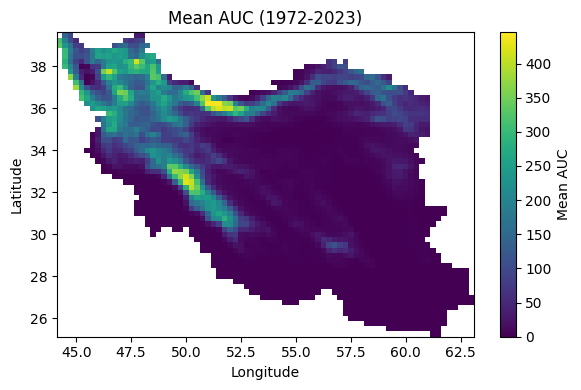

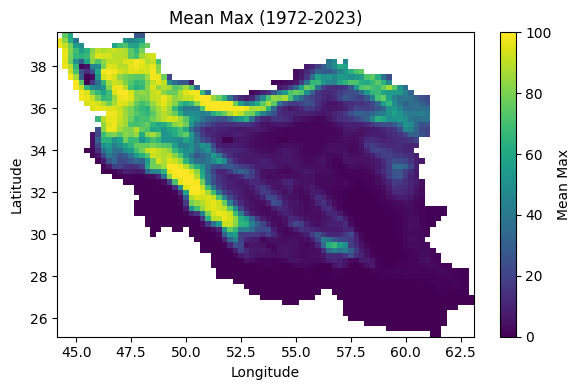

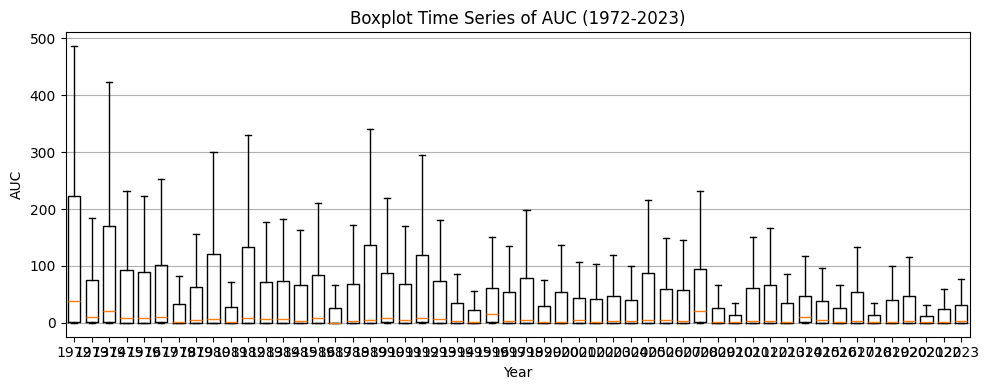

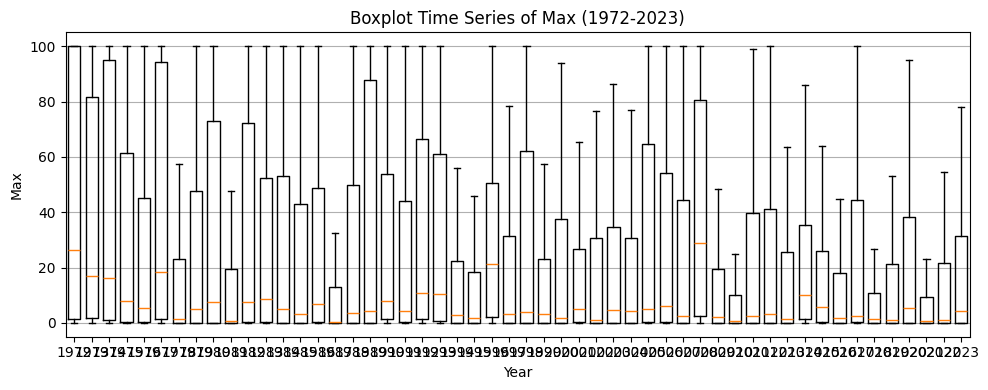

In [27]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# Load the NetCDF file
ds = xr.open_dataset("auc_max_results/snowc_auc_max.nc")

# 1. Plot mean maps for AUC and Max
for var in ['AUC', 'Max']:
    mean_map = ds[var].mean(dim='year')
    plt.figure(figsize=(6, 4))
    im = plt.pcolormesh(ds['longitude'], ds['latitude'], mean_map, cmap='viridis')
    plt.colorbar(im, label=f'Mean {var}')
    plt.title(f'Mean {var} (1972-2023)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.savefig(f"auc_max_results/snowcover_mean_map_{var}.png", dpi=150)
    plt.show()

# 2. Boxplot time series for each year (distribution across all grid cells)
for var in ['AUC', 'Max']:
    # Flatten lat/lon for each year
    data = ds[var].values  # shape: (year, lat, lon)
    n_years = data.shape[0]
    data_flat = data.reshape(n_years, -1)  # shape: (year, n_points)
    years = ds['year'].values

    plt.figure(figsize=(10, 4))
    plt.boxplot([data_flat[i, ~np.isnan(data_flat[i])] for i in range(n_years)],
                positions=years, widths=0.7, showfliers=False)
    plt.title(f'Boxplot Time Series of {var} (1972-2023)')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"auc_max_results/sc_boxplot_timeseries_{var}.png", dpi=150)
    plt.show()

In [24]:
import xarray as xr
import rioxarray
import geopandas as gpd
import numpy as np
import os

# Load data and shapefile
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
iran_shp = gpd.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")

# Clip snow cover data to Iran
da = data_Snow['sd']
da = da.rio.write_crs("EPSG:4326")
da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)

# Prepare output arrays
years = np.unique(da_clip['time.year'].values)
latitudes = da_clip.latitude.values
longitudes = da_clip.longitude.values

AUC = np.full((len(years), len(latitudes), len(longitudes)), np.nan)
Max = np.full((len(years), len(latitudes), len(longitudes)), np.nan)

for y_idx, y in enumerate(years):
    # Select data for this year (should be 12 months)
    da_year = da_clip.sel(time=str(y))
    if da_year.shape[0] < 2:
        continue  # skip years with less than 2 months of data
    # For each grid cell
    for lat_idx, lat in enumerate(latitudes):
        for lon_idx, lon in enumerate(longitudes):
            ts = da_year[:, lat_idx, lon_idx].values
            if np.all(np.isnan(ts)):
                continue
            # Area under curve (AUC) using trapezoidal rule
            AUC[y_idx, lat_idx, lon_idx] = np.trapz(ts, dx=1)  # dx=1 for months
            Max[y_idx, lat_idx, lon_idx] = np.nanmax(ts)

# Create xarray Dataset
ds_sd = xr.Dataset(
    {
        "AUC": (("year", "latitude", "longitude"), AUC),
        "Max": (("year", "latitude", "longitude"), Max)
    },
    coords={
        "year": years,
        "latitude": latitudes,
        "longitude": longitudes
    }
)

# Save as NetCDF
os.makedirs("auc_max_results", exist_ok=True)
ds_sd.to_netcdf("auc_max_results/sd_auc_max.nc")

print("Saved results to auc_max_results/sd_auc_max.nc")

Saved results to auc_max_results/sd_auc_max.nc


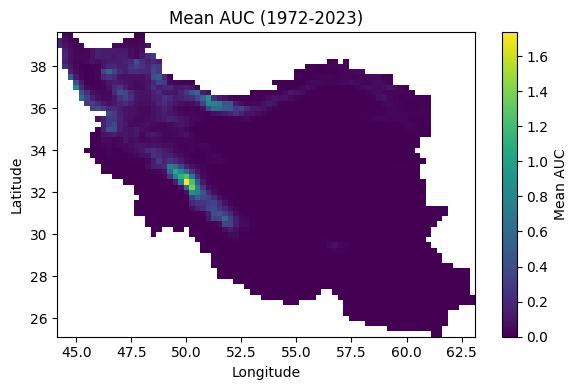

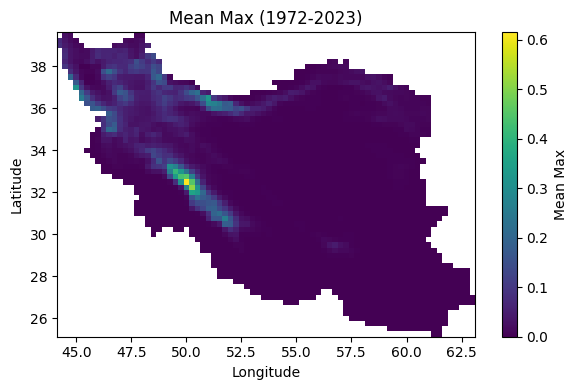

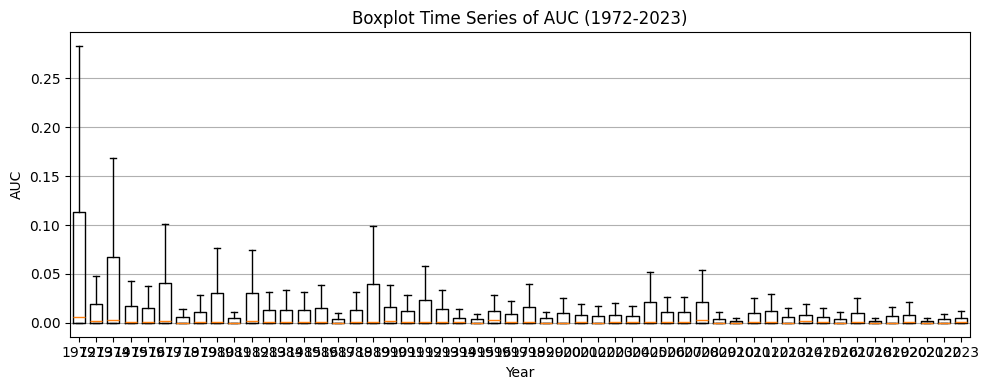

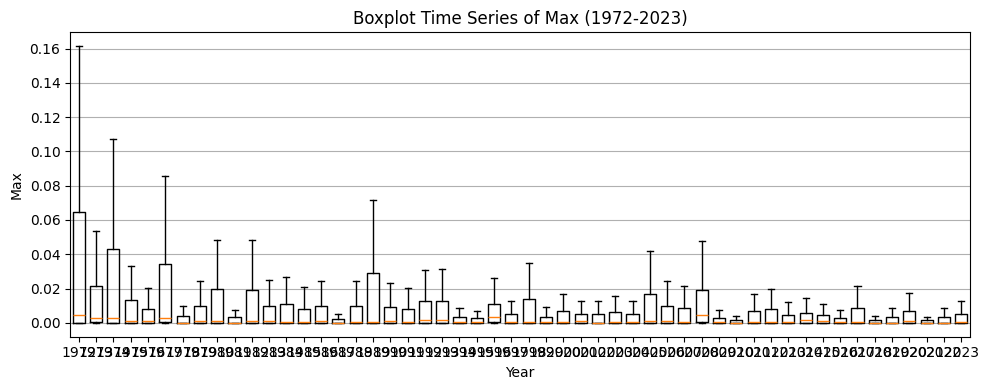

In [26]:
import xarray as xr
import matplotlib.pyplot as plt
import os

# Load the NetCDF file
ds = xr.open_dataset("auc_max_results/sd_auc_max.nc")

# 1. Plot mean maps for AUC and Max
for var in ['AUC', 'Max']:
    mean_map = ds[var].mean(dim='year')
    plt.figure(figsize=(6, 4))
    im = plt.pcolormesh(ds['longitude'], ds['latitude'], mean_map, cmap='viridis')
    plt.colorbar(im, label=f'Mean {var}')
    plt.title(f'Mean {var} (1972-2023)')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.tight_layout()
    plt.savefig(f"auc_max_results/mean_map_{var}.png", dpi=150)
    plt.show()

# 2. Boxplot time series for each year (distribution across all grid cells)
for var in ['AUC', 'Max']:
    # Flatten lat/lon for each year
    data = ds[var].values  # shape: (year, lat, lon)
    n_years = data.shape[0]
    data_flat = data.reshape(n_years, -1)  # shape: (year, n_points)
    years = ds['year'].values

    plt.figure(figsize=(10, 4))
    plt.boxplot([data_flat[i, ~np.isnan(data_flat[i])] for i in range(n_years)],
                positions=years, widths=0.7, showfliers=False)
    plt.title(f'Boxplot Time Series of {var} (1972-2023)')
    plt.xlabel('Year')
    plt.ylabel(var)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.savefig(f"auc_max_results/sd_boxplot_timeseries_{var}.png", dpi=150)
    plt.show()

Saved snow drought index to snow_drought_index/snow_drought_index2.nc


C:\Users\AAAli\AppData\Local\Temp\ipykernel_16260\3041112699.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


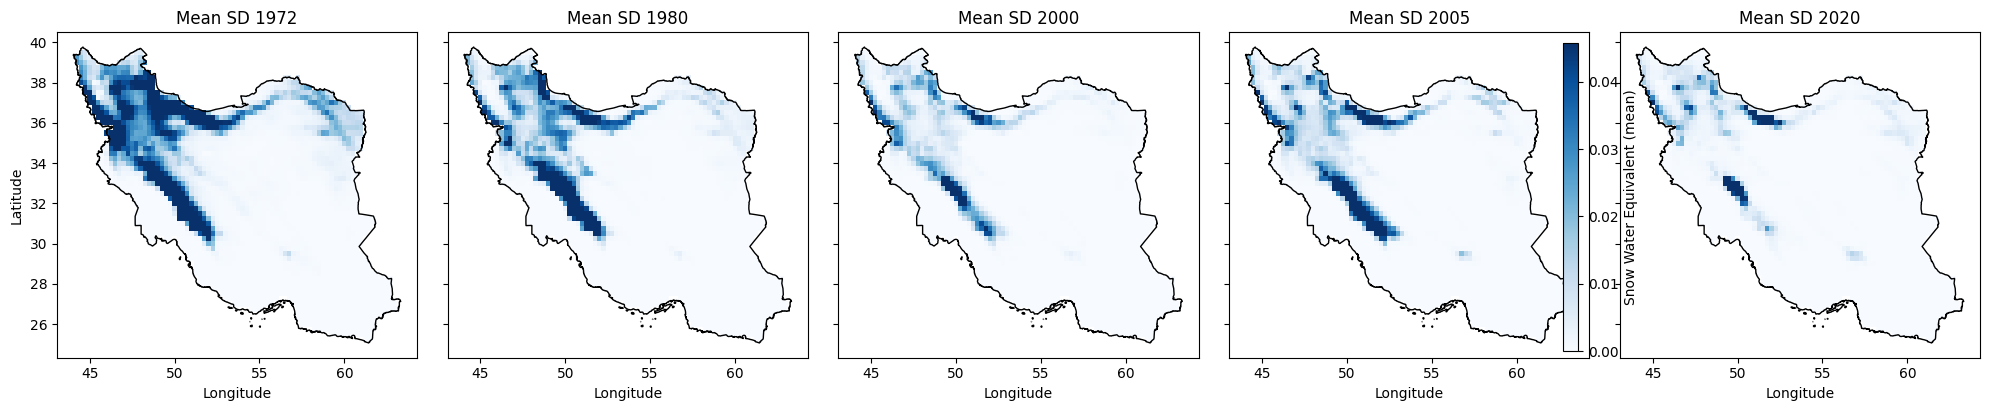

In [38]:
import xarray as xr
import rioxarray
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt

# Load data and shapefile
data_Snow = xr.open_dataset("srs_cuted_1972-2023.nc")
iran_shp = geopandas.read_file(r"Iran\iran layer\IRAN.shp")
iran_shp = iran_shp.to_crs("EPSG:4326")

# Clip snow depth water equivalent data to Iran
da = data_Snow['sd']
da = da.rio.write_crs("EPSG:4326")
da_clip = da.rio.clip(iran_shp.geometry, iran_shp.crs, drop=True, invert=False)

# Aggregate to annual mean (change to .sum(dim='time') for annual total)
annual_mean = da_clip.groupby('time.year').mean(dim='time')  # shape: (year, lat, lon)

# Calculate mean over all years for each grid cell
mean_overall = annual_mean.mean(dim='year')  # shape: (lat, lon)

# Calculate the snow drought index for each year and grid cell
# Broadcasting mean_overall to (year, lat, lon)
snow_drought_index = ((annual_mean - mean_overall) / mean_overall) * 100

# Save as NetCDF
os.makedirs("snow_drought_index", exist_ok=True)
snow_drought_index.name = "snow_drought_index"
snow_drought_index.attrs['description'] = "Snow drought index (%) based on annual mean snow depth water equivalent"
snow_drought_index.to_netcdf("snow_drought_index/snow_drought_index2.nc")

print("Saved snow drought index to snow_drought_index/snow_drought_index2.nc")

# ----------------- Plot mean snow water equivalent for selected years -----------------
years_to_plot = [1972, 1980, 2000, 2005, 2020]

fig, axs = plt.subplots(1, len(years_to_plot), figsize=(20, 4), sharey=True)
vmin = np.nanpercentile(annual_mean.values, 2)
vmax = np.nanpercentile(annual_mean.values, 98)

for i, year in enumerate(years_to_plot):
    if year in annual_mean['year']:
        data = annual_mean.sel(year=year)
        im = axs[i].pcolormesh(annual_mean['longitude'], annual_mean['latitude'], data, cmap='Blues', vmin=vmin, vmax=vmax)
        iran_shp.boundary.plot(ax=axs[i], edgecolor='black', linewidth=1)
        axs[i].set_title(f"Mean SD {year}")
        axs[i].set_xlabel('Longitude')
        if i == 0:
            axs[i].set_ylabel('Latitude')
    else:
        axs[i].set_visible(False)

fig.colorbar(im, ax=axs, orientation='vertical', label='Snow Water Equivalent (mean)')
plt.tight_layout()
plt.savefig("snow_drought_index/annual_mean_maps_selected_years.png", dpi=150)
plt.show()

SDI min: -100.0 max: 5100.000000000001
Any finite values? True


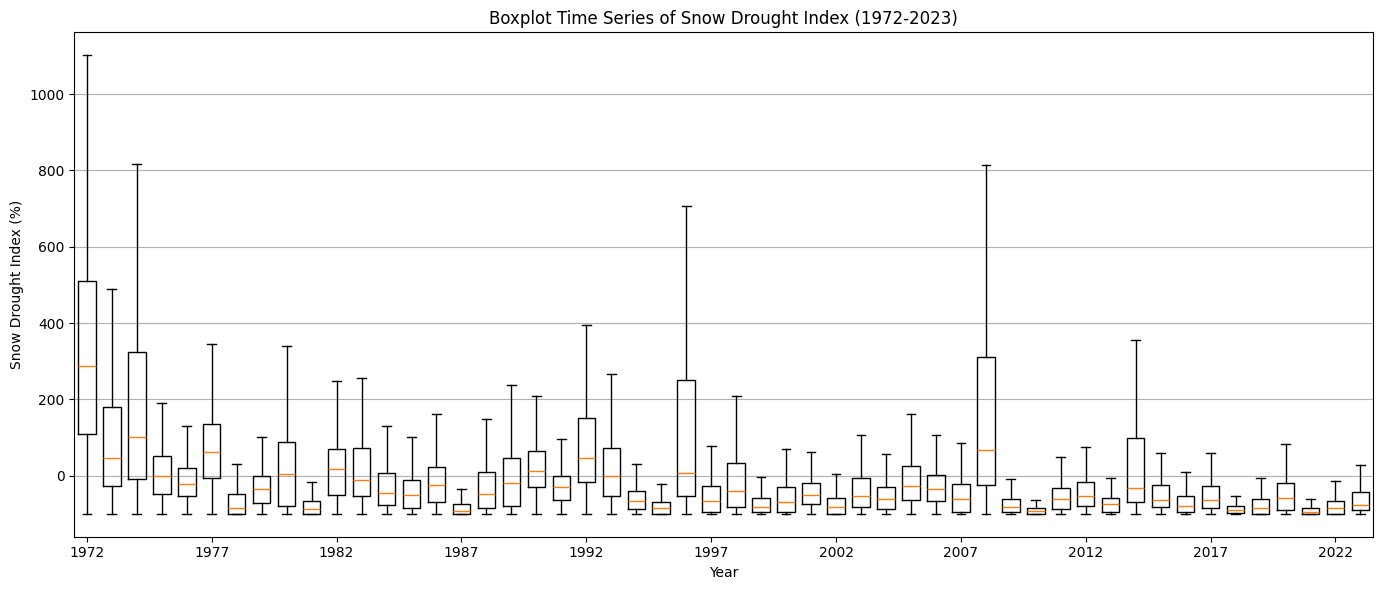

In [39]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Load the NetCDF file
ds = xr.open_dataset("snow_drought_index/snow_drought_index.nc")
sdi = ds['snow_drought_index']

# Debug: Check the data range
print("SDI min:", np.nanmin(sdi.values), "max:", np.nanmax(sdi.values))
print("Any finite values?", np.any(np.isfinite(sdi.values)))


# 1. Boxplot time series for each year (distribution across all grid cells)
data = sdi.values  # shape: (year, lat, lon)
n_years = data.shape[0]
data_flat = data.reshape(n_years, -1)  # shape: (year, n_points)
years = ds['year'].values

plt.figure(figsize=(14, 6))
plt.boxplot([data_flat[i, ~np.isnan(data_flat[i])] for i in range(n_years)],
            positions=years, widths=0.7, showfliers=False)
plt.title('Boxplot Time Series of Snow Drought Index (1972-2023)')
plt.xlabel('Year')
plt.ylabel('Snow Drought Index (%)')
plt.grid(True, axis='y')
plt.tight_layout()

# Set x-ticks to every 5th year
ax = plt.gca()
ax.set_xticks(years[::5])
ax.set_xticklabels([str(int(y)) for y in years[::5]])

plt.savefig("snow_drought_index/boxplot_timeseries_snow_drought_index.png", dpi=150)
plt.show()